In [1]:
!pip install --upgrade setuptools pip --user

!pip install onnx
!pip install coremltools>=4.1

  Using cached setuptools-70.3.0-py3-none-any.whl (931 kB)
  Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\HP\.conda\envs\tf_2_10\python.exe -m pip install --upgrade setuptools pip --user


In [3]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.9.15 (main, Nov  4 2022, 16:35:55) [MSC v.1916 64 bit (AMD64)], sys.version_info(major=3, minor=9, micro=15, releaselevel='final', serial=0) 
Pytorch version: 1.11.0+cu113 


In [4]:
!nvidia-smi

Fri Jul 12 21:43:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8               6W /  60W |     52MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
#!ls

C:\Users\HP\Documents\CV-projects\2D-Object-Tracking-Model-Evaluation\yolov7\yolov7


Cloning into 'yolov7'...


In [11]:
%cd ..

C:\Users\HP\Documents\CV-projects\2D-Object-Tracking-Model-Evaluation\yolov7


In [12]:
!python detect.py --weights ./yolov7.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg

Namespace(weights=['./yolov7.pt'], source='inference/images/horses.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 horses, Done. (19.9ms) Inference, (41.8ms) NMS
 The image with the result is saved in: runs\detect\exp\horses.jpg
Done. (0.199s)


YOLOR  v0.1-128-ga207844 torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4095.5MB)

Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
C:\Users\HP\.conda\envs\tf_2_10\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


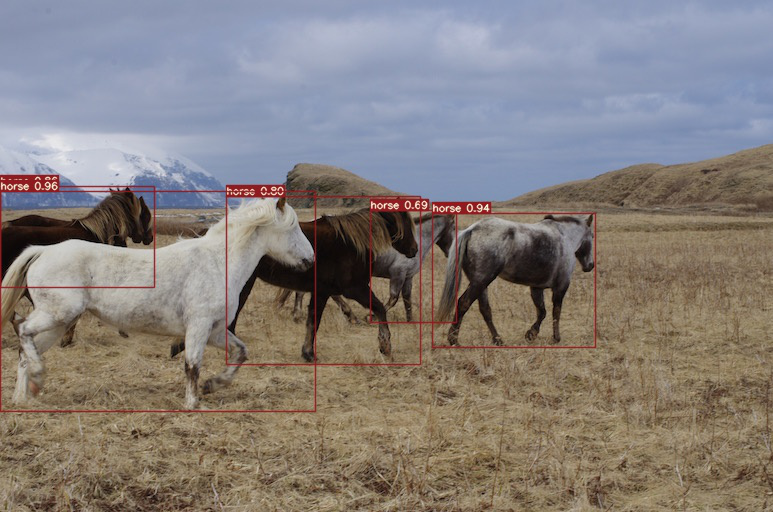

In [18]:
from PIL import Image
Image.open('./runs/detect/exp/horses.jpg')

In [ ]:
!python detect.py --weights ./yolov7.pt --conf 0.25 --img-size 640 --source C:\Users\HP\Documents\CV-projects\YOLOV7\yolov7\football.mp4

In [16]:
# export CoreML model for iOS/MacOS: yolov7-tiny.mlmodel
!python export.py --weights ./yolov7-tiny.pt --img-size 640 640

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(weights='./yolov7-tiny.pt', img_size=[640, 640], batch_size=1, dynamic=False, dynamic_batch=False, grid=False, end2end=False, max_wh=None, topk_all=100, iou_thres=0.45, conf_thres=0.25, device='cpu', simplify=False, include_nms=False, fp16=False, int8=False)

Fusing layers... 

Starting TorchScript export with torch 1.11.0+cu113...
TorchScript export success, saved as ./yolov7-tiny.torchscript.pt

Starting CoreML export with coremltools 7.2...
CoreML export failure: BlobWriter not loaded

Starting TorchScript-Lite export with torch 1.11.0+cu113...
TorchScript-Lite export success, saved as ./yolov7-tiny.torchscript.ptl

Starting ONNX export with onnx 1.16.1...
ONNX export success, saved as ./yolov7-tiny.onnx

Export complete (21.18s). Visualize with https://github.com/lutzroeder/netron.


YOLOR  v0.1-128-ga207844 torch 1.11.0+cu113 CPU


  0%|          | 0.00/12.1M [00:00<?, ?B/s]
  2%|2         | 272k/12.1M [00:00<00:04, 2.75MB/s]
  8%|7         | 960k/12.1M [00:00<00:03, 3.69MB/s]
 15%|#5        | 1.86M/12.1M [00:00<00:01, 5.88MB/s]
 20%|##        | 2.46M/12.1M [00:00<00:01, 5.39MB/s]
 26%|##6       | 3.19M/12.1M [00:00<00:01, 6.06MB/s]
 32%|###1      | 3.84M/12.1M [00:00<00:01, 6.30MB/s]
 37%|###7      | 4.47M/12.1M [00:00<00:01, 6.23MB/s]
 43%|####2     | 5.14M/12.1M [00:00<00:01, 6.40MB/s]
 48%|####7     | 5.78M/12.1M [00:01<00:01, 6.39MB/s]
 54%|#####3    | 6.45M/12.1M [00:01<00:00, 6.45MB/s]
 59%|#####8    | 7.08M/12.1M [00:01<00:00, 6.47MB/s]
 64%|######3   | 7.70M/12.1M [00:01<00:00, 6.40MB/s]
 69%|######9   | 8.32M/12.1M [00:01<00:00, 6.17MB/s]
 75%|#######4  | 9.00M/12.1M [00:01<00:00, 6.45MB/s]
 80%|########  | 9.70M/12.1M [00:01<00:00, 6.60MB/s]
 86%|########5 | 10.4M/12.1M [00:01<00:00, 6.64MB/s]
 91%|#########1| 11.0M/12.1M [00:01<00:00, 6.59MB/s]
 97%|##

In [9]:
# show ONNX model
!ls

cfg	    inference	      scripts	       yolov7-tiny.mlmodel
data	    LICENSE.md	      test.py	       yolov7-tiny.onnx
deploy	    models	      tools	       yolov7-tiny.pt
detect.py   paper	      traced_model.pt  yolov7-tiny.torchscript.pt
export.py   README.md	      train_aux.py     yolov7-tiny.torchscript.ptl
figure	    requirements.txt  train.py
hubconf.py  runs	      utils


In [10]:
# Load Coreml-model
import coremltools as ct

model_filename = 'yolov7-tiny.mlmodel'
model = ct.models.MLModel(model_filename)

In [11]:
# Load image
from PIL import Image
import cv2
import numpy as np

im = cv2.imread('/content/yolov7/inference/images/horses.jpg')
im = cv2.resize(im, (640, 640))
print(f" im = {im.shape}")
b = 1
h, w, ch = im.shape

im = Image.fromarray((im).astype('uint8'))
print(f" im = {im}")

 im = (640, 640, 3)
 im = <PIL.Image.Image image mode=RGB size=640x640 at 0x7F8E0F0CD9D0>


In [12]:
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y

In [ ]:
# Inference only for MacOS and iOS!!!

#y = model.predict({'image': im})  # coordinates are xywh normalized
#if 'confidence' in y:
#  box = xywh2xyxy(y['coordinates'] * [[w, h, w, h]])  # xyxy pixels
#  conf, cls = y['confidence'].max(1), y['confidence'].argmax(1).astype(np.float)
#  y = np.concatenate((box, conf.reshape(-1, 1), cls.reshape(-1, 1)), 1)
#else:
#  k = 'var_' + str(sorted(int(k.replace('var_', '')) for k in y)[-1])  # output key
#  y = y[k]  # output
#
#print(y)